In [1]:
!pip install keras
!pip install numpy
!pip install matplotlib
!pip install nltk


In [2]:
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
pip install tensorflow


     -------------------------------------- 300.8/300.8 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 938.4/938.4 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
Note: you may need to restart the kernel to use upda

In [1]:
pip uninstall tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Anything above 2.10 is not supported on the GPU on Windows Native
!pip install "tensorflow<2.11" 

     ----------------------                 266.4/455.9 MB 2.3 MB/s eta 0:01:22


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\MS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\MS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\MS\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\MS\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\MS\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\MS\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\MS\anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\MS\anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read op

In [7]:
pip install --upgrade keras tensorflow


  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import json
import pickle



In [4]:
import numpy as np

import random

In [5]:


from keras.optimizers import SGD

In [6]:
from keras.layers import Dense, Activation, Dropout

In [7]:
from keras.models import Sequential

In [10]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open(r"C:\Users\MS\Downloads\VITchat\intents.json").read()
intents = json.loads(data_file)

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

246 documents
58 classes ['All mart', 'Amusement Parks', 'Attendance eligibility criteria', 'Auditorium', 'Beaches', 'Breakfast', 'Cool drinks', 'Food court', 'Fresh Juices', 'Grading pattern', 'Grading range', 'Health and Fitness', 'Historical places', 'Ice cream', 'Indoor', 'Library', 'Lunch', 'Malls', 'No', 'Outdoor', 'PRP', 'Parks', 'Restaurants outside VIT', 'SJT', 'Snacks', 'Supermarket outside VIT', 'Technology Tower', 'Temples', 'Xerox Shop', 'boys and girls gym', 'boys hostel', 'boys hostel authorities', 'boys hostel gym', 'boys hostel mess', 'club', 'code of conduct', 'college details', 'dominos', 'fillers', 'gazebo', 'girls hostel', 'girls hostel authorities', 'girls hostel mess', 'goodbye', 'greeting', 'guest house VIT', 'gym khaana', 'health center', 'hostel', 'hostel link', 'otherclubs', 'placement eligibility', 'places to visit', 'sports', 'technical', 'thanks', 'video', 'website link']
191 unique lemmatized words ["'s", '80', '90', 'a', 'about', 'acitivities', 'activity

In [16]:
pickle.dump(words,open('texts.pkl','wb'))
pickle.dump(classes,open('labels.pkl','wb'))

In [17]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])


In [18]:
# Assuming `training` is the list being examined
for index, element in enumerate(training):
    print(f"Element {index}:")
    print(f"Type: {type(element)}")
    
    if not isinstance(element, list):
        print("Type problem: Element is not a list")
        break
    
    if len(element) > 2:
        print("Shape problem: Sequence length is greater than 2")
        break
    
    print(f"Shape: {len(element)}")
    print("-------------------------")



Element 0:
Type: <class 'list'>
Shape: 2
-------------------------
Element 1:
Type: <class 'list'>
Shape: 2
-------------------------
Element 2:
Type: <class 'list'>
Shape: 2
-------------------------
Element 3:
Type: <class 'list'>
Shape: 2
-------------------------
Element 4:
Type: <class 'list'>
Shape: 2
-------------------------
Element 5:
Type: <class 'list'>
Shape: 2
-------------------------
Element 6:
Type: <class 'list'>
Shape: 2
-------------------------
Element 7:
Type: <class 'list'>
Shape: 2
-------------------------
Element 8:
Type: <class 'list'>
Shape: 2
-------------------------
Element 9:
Type: <class 'list'>
Shape: 2
-------------------------
Element 10:
Type: <class 'list'>
Shape: 2
-------------------------
Element 11:
Type: <class 'list'>
Shape: 2
-------------------------
Element 12:
Type: <class 'list'>
Shape: 2
-------------------------
Element 13:
Type: <class 'list'>
Shape: 2
-------------------------
Element 14:
Type: <class 'list'>
Shape: 2
----------------

In [19]:
# shuffle our features and turn into np.array
random.shuffle(training)



In [20]:
# training = np.array(training)
# Extract features and labels separately
features = [x[0] for x in training]
labels = [x[1] for x in training]

# # Convert features and labels to NumPy arrays
# features_array = np.array(features)
# labels_array = np.array(labels)

In [21]:
# create train and test lists. X - patterns, Y - intents
# train_x = list(features_array[:,0])
# train_y = list(labels_array[:,1])
train_x = features
train_y = labels
print("Training data created")

Training data created


In [22]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [23]:
from tensorflow.keras.optimizers import SGD as LegacySGD

In [24]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [25]:
#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=500, batch_size=5, verbose=1)
model.save('model.h5', hist)


Epoch 1/500



50/50 [==============================] - 2s 5ms/step - loss: 4.0652 - accuracy: 0.0285
Epoch 2/500
50/50 [==============================] - 0s 4ms/step - loss: 4.0232 - accuracy: 0.0366
Epoch 3/500
50/50 [==============================] - 0s 4ms/step - loss: 3.9588 - accuracy: 0.0569
Epoch 4/500
50/50 [==============================] - 0s 4ms/step - loss: 3.8589 - accuracy: 0.0691
Epoch 5/500
50/50 [==============================] - 0s 4ms/step - loss: 3.7602 - accuracy: 0.0976
Epoch 6/500
50/50 [==============================] - 0s 4ms/step - loss: 3.5801 - accuracy: 0.1098
Epoch 7/500
50/50 [==============================] - 0s 4ms/step - loss: 3.4633 - accuracy: 0.1382
Epoch 8/500
50/50 [==============================] - 0s 4ms/step - loss: 3.3313 - accuracy: 0.1748
Epoch 9/500
50/50 [==============================] - 0s 4ms/step - loss: 3.2098 - accuracy: 0.2073
Epoch 10/500
50/50 [==============================] - 0s 4ms/step - loss: 2.9678 - accuracy: 0.2520
Epoch 11/500
50/50 [=

50/50 [==============================] - 0s 4ms/step - loss: 0.4315 - accuracy: 0.8659
Epoch 84/500
50/50 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.8537
Epoch 85/500
50/50 [==============================] - 0s 5ms/step - loss: 0.4285 - accuracy: 0.8780
Epoch 86/500
50/50 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8699
Epoch 87/500
50/50 [==============================] - 0s 5ms/step - loss: 0.3368 - accuracy: 0.9065
Epoch 88/500
50/50 [==============================] - 0s 5ms/step - loss: 0.4080 - accuracy: 0.8577
Epoch 89/500
50/50 [==============================] - 0s 5ms/step - loss: 0.4889 - accuracy: 0.8415
Epoch 90/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.8659
Epoch 91/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.8496
Epoch 92/500
50/50 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.8211
Epoch 93/500


50/50 [==============================] - 0s 4ms/step - loss: 0.2731 - accuracy: 0.9187
Epoch 165/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8862
Epoch 166/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3415 - accuracy: 0.9187
Epoch 167/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.8984
Epoch 168/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2945 - accuracy: 0.8821
Epoch 169/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.9268
Epoch 170/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8902
Epoch 171/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2942 - accuracy: 0.9024
Epoch 172/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2331 - accuracy: 0.9228
Epoch 173/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.8943
Epoc

50/50 [==============================] - 0s 4ms/step - loss: 0.4567 - accuracy: 0.8537
Epoch 246/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3053 - accuracy: 0.9106
Epoch 247/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3202 - accuracy: 0.8902
Epoch 248/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.9024
Epoch 249/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.9106
Epoch 250/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.9024
Epoch 251/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.9106
Epoch 252/500
50/50 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9431
Epoch 253/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.8902
Epoch 254/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2531 - accuracy: 0.9187
Epoc

50/50 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8943
Epoch 327/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.9024
Epoch 328/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.8902
Epoch 329/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9187
Epoch 330/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.8984
Epoch 331/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.8862
Epoch 332/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8902
Epoch 333/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8902
Epoch 334/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.9106
Epoch 335/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.8902
Epoc

50/50 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.9268
Epoch 408/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.9106
Epoch 409/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.8984
Epoch 410/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.9024
Epoch 411/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.9106
Epoch 412/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.8984
Epoch 413/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4049 - accuracy: 0.9024
Epoch 414/500
50/50 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.9350
Epoch 415/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.9390
Epoch 416/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.8943
Epoc

50/50 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9472
Epoch 489/500
50/50 [==============================] - 0s 5ms/step - loss: 0.2781 - accuracy: 0.9228
Epoch 490/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.9146
Epoch 491/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2656 - accuracy: 0.9350
Epoch 492/500
50/50 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.9350
Epoch 493/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8821
Epoch 494/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9309
Epoch 495/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.9065
Epoch 496/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2763 - accuracy: 0.9187
Epoch 497/500
50/50 [==============================] - 0s 4ms/step - loss: 0.2193 - accuracy: 0.9350
Epoc

C:\Users\MS\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


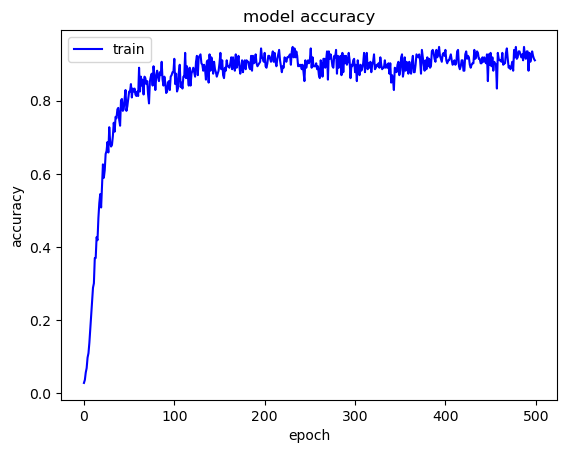

In [26]:
#accuracy
plt.plot(hist.history['accuracy'],color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

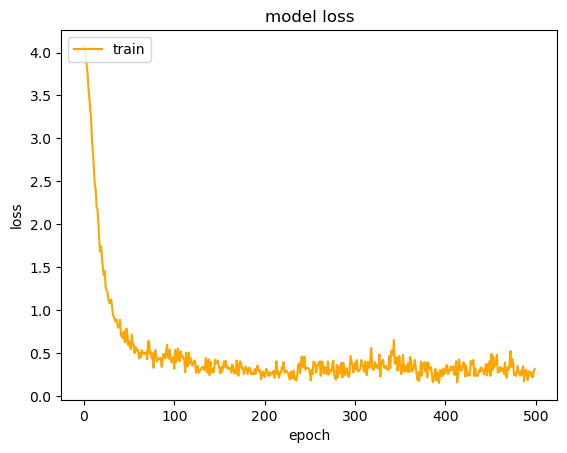

model created


In [27]:
#loss
plt.plot(hist.history['loss'],color='orange')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

print("model created")